Student Information

Name: 詹秉宸

Student ID: 110065524

GitHub ID: s110065524

Kaggle name: looyee19

Kaggle private scoreboard snapshot: best_pridiction_score.jpg

Snapshot
Instructions
First: This part is worth 30% of your grade. Do the take home exercises in the DM2021-Lab2-master Repo. You may need to copy some cells from the Lab notebook to this notebook.
Second: This part is worth 30% of your grade. Participate in the in-class Kaggle Competition regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking:

Bottom 40%: Get 20% of the 30% available for this section.

Top 41% - 100%: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)
Submit your last submission BEFORE the deadline (Dec. 24th 11:59 pm, Friday). Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the img folder of this repository and rerun the cell Student Information.

Third: This part is worth 30% of your grade. A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.
Fourth: This part is worth 10% of your grade. It's hard for us to follow if your code is messy :'(, so please tidy up your notebook and add minimal comments where needed.
Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objects as go

In [2]:
test_df = pd.read_pickle("./HW_test.pkl")
train_df = pd.read_pickle("./HW_train.pkl")

In [3]:
train_df.groupby(['label']).count()['text']

label
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

In [8]:
test_df[:2]

,_score,hashTag,tweet_id,text
2,232,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
4,989,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


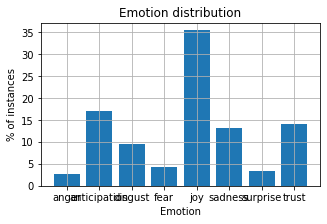

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['label'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['label']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [6]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/zhanbingchen/miniconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1455563, 500)

In [9]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['label']

X_test = BOW_500.transform(test_df['text'])
#y_test = test_df['label']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
#print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)


In [11]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)


In [12]:
## predict!
y_test_pred = DT_model.predict(X_test)

In [13]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
#acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
#print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

#print(classification_report(y_true=y_test, y_pred=y_test_pred))


training accuracy: 0.97


In [51]:
DT_prediction = pd.DataFrame(columns = ['id','emotion'])
DT_prediction['emotion'] = y_test_pred
DT_prediction['id'] = test_df['tweet_id'].tolist()
DT_prediction.to_csv("DT_prediction.csv", index=False)

The best score of Decision Tree Classifier method  is 0.29427

In [57]:
from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
#print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
#y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
#print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
3            fear
5             joy
Name: label, dtype: object

y_train.shape:  (1455563,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1455563, 8)


In [58]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


In [72]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               64128     
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 re_lu_5 (ReLU)              (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 softmax_2 (Softmax)         (None, 8)                 0   

In [73]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 5
batch_size = 256

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_split=0
                    )
print('training finish')

Epoch 1/5


/Users/zhanbingchen/miniconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/model_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
2022-01-04 16:47:44.329282: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 1344785 of 1455563


   2/5686 [..............................] - ETA: 9:00 - loss: 2.0979 - accuracy: 0.1484    

2022-01-04 16:47:45.548559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.


5686/5686 [==============================] - 90s 13ms/step - loss: 1.4203 - accuracy: 0.4829
Epoch 2/5
   3/5686 [..............................] - ETA: 4:02 - loss: 1.3832 - accuracy: 0.5000    

2022-01-04 16:49:13.068047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 1448412 of 1455563
2022-01-04 16:49:13.119032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.


5686/5686 [==============================] - 87s 13ms/step - loss: 1.3661 - accuracy: 0.5025
Epoch 3/5
5686/5686 [==============================] - 107s 17ms/step - loss: 1.3503 - accuracy: 0.5082
Epoch 4/5


2022-01-04 16:52:28.112817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 1356857 of 1455563


  12/5686 [..............................] - ETA: 1:26 - loss: 1.3308 - accuracy: 0.5104

2022-01-04 16:52:28.759783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.


5686/5686 [==============================] - 77s 12ms/step - loss: 1.3406 - accuracy: 0.5116
Epoch 5/5
5686/5686 [==============================] - 71s 11ms/step - loss: 1.3336 - accuracy: 0.5143
training finish


In [74]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anticipation', 'anticipation', 'sadness', 'joy', 'anticipation'],
      dtype=object)

In [75]:
DL_prediction = pd.DataFrame(columns = ['id','emotion'])
DL_prediction['emotion'] = pred_result
DL_prediction['id'] = test_df['tweet_id'].tolist()
DL_prediction.to_csv("DL_prediction.csv", index=False)

The best score of deep learning  method is 0.41790